In [127]:
import numpy as np

In [128]:
import matplotlib.pyplot as plt

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  RandomForestClassifier
from sklearn import metrics

In [130]:
import numpy as np

In [131]:
import pandas as pd
import os
import glob

In [ ]:
one_train = pd.read_csv("one_train_combine.csv")
one_test = pd.read_csv("one_test_combine.csv")

In [133]:
one_train

,Unnamed: 0_x,Horiz_acc,id_x,av_horiz,sd_horiz,peak_horiz,rms_horiz,skew_horiz,kurt_horiz,crest_horiz,...,peak_temp,rms_temp,skew_temp,kurt_temp,crest_temp,clear_temp,shape_temp,imp_temp,RUL_y,id
0,28169.0,-0.687,1.0,0.199769,0.378617,0.917,0.421599,-0.509550,-0.252213,2.175055,...,70.303,70.168972,0.009265,-1.213437,1.00191,1.001911,1.000001,1.001911,14160.1,1.0
1,28179.0,0.617,1.0,0.209808,0.386307,0.917,0.433027,-0.512467,-0.362140,2.117648,...,70.303,70.168972,0.009265,-1.213437,1.00191,1.001911,1.000001,1.001911,14160.1,1.0
2,28189.0,0.103,1.0,0.178500,0.358700,0.727,0.394435,-0.688946,-0.358079,1.843143,...,70.303,70.168972,0.009265,-1.213437,1.00191,1.001911,1.000001,1.001911,14160.1,1.0
3,28199.0,0.036,1.0,0.189885,0.348786,0.727,0.391189,-0.772345,-0.057269,1.858437,...,70.303,70.168972,0.009265,-1.213437,1.00191,1.001911,1.000001,1.001911,14160.1,1.0
4,28209.0,-0.577,1.0,0.152615,0.376958,0.727,0.399905,-0.660933,-0.446055,1.817934,...,70.303,70.168972,0.009265,-1.213437,1.00191,1.001911,1.000001,1.001911,14160.1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194170,5782999.0,1.251,1.0,0.438269,2.219883,8.607,2.220456,2.063591,5.276878,3.876231,...,100.253,100.232917,0.337115,-1.146364,1.00020,1.000200,1.000000,1.000200,0.0,4.0
2194171,5783009.0,-0.978,1.0,0.265846,2.144994,8.607,2.120073,2.410084,7.032378,4.059765,...,100.253,100.232917,0.337115,-1.146364,1.00020,1.000200,1.000000,1.000200,0.0,4.0
2194172,5783019.0,0.448,1.0,-0.047962,1.310312,3.293,1.285762,0.188332,0.545341,2.561128,...,100.253,100.232917,0.337115,-1.146364,1.00020,1.000200,1.000000,1.000200,0.0,4.0
2194173,5783029.0,0.285,1.0,-0.048385,1.310198,3.293,1.285666,0.189358,0.546782,2.561318,...,100.253,100.232917,0.337115,-1.146364,1.00020,1.000200,1.000000,1.000200,0.0,4.0


In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

one_train = clean_dataset(one_train)
one_test = clean_dataset(one_test)

In [134]:
one_train = one_train.reset_index()
one_test = one_test.reset_index()

### step 1 classification

In [135]:
imp_df = pd.read_csv("feature_selection_1.csv")

In [136]:
def three_time_group(one_train):
    time_group_list = []
    for i in range(1,int(one_train["id"].max())+1,1):
        one_id = one_train[one_train["id"]==i][["id","RUL_x"]]
        one_id = one_id.reset_index()
        one_id.loc[one_id["RUL_x"]>one_id.loc[0,"RUL_x"]/2,"time_group"] = 0
        one_id.loc[(one_id["RUL_x"]<one_id.loc[0,"RUL_x"]/2) & (one_id["RUL_x"]>one_id.loc[0,"RUL_x"]*0.25),"time_group"] = 1
        one_id.loc[one_id["RUL_x"]<one_id.loc[0,"RUL_x"]*0.25,"time_group"] = 2
        time_group_list = time_group_list + list(one_id["time_group"].values)
    one_train["time_group"] = time_group_list
    return one_train

In [386]:
max_list = []
for i in range(1,int(one_train["id"].max())+1,1):
    one_id = one_train[one_train["id"]==i][["id","RUL_x"]]
    one_id = one_id.reset_index()
    max_list.append(one_id.loc[0,"RUL_x"])

In [388]:
np.median(max_list)

23470.0996095

In [383]:
one_test

,index,Unnamed: 0_x,Horiz_acc,id_x,av_horiz,sd_horiz,peak_horiz,rms_horiz,skew_horiz,kurt_horiz,...,skew_temp,kurt_temp,crest_temp,clear_temp,shape_temp,imp_temp,RUL_y,id,time_group,time
0,0,17929.0,0.204,1.0,-0.000808,0.522451,1.185,0.512306,0.452596,-0.062617,...,-0.027677,-1.256711,1.000972,1.000972,1.0,1.000972,27950.1,1.0,0.0,0.000000
1,1,17939.0,0.273,1.0,-0.002846,0.521227,1.185,0.511113,0.464104,-0.031312,...,-0.027677,-1.256711,1.000972,1.000972,1.0,1.000972,27950.1,1.0,0.0,0.000391
2,2,17949.0,0.857,1.0,0.049308,0.537192,1.185,0.529063,0.319226,-0.303938,...,-0.027677,-1.256711,1.000972,1.000972,1.0,1.000972,27950.1,1.0,0.0,0.000781
3,3,17959.0,-0.116,1.0,0.034231,0.536075,1.185,0.526778,0.408109,-0.243211,...,-0.027677,-1.256711,1.000972,1.000972,1.0,1.000972,27950.1,1.0,0.0,0.001172
4,4,17969.0,0.627,1.0,0.012769,0.497978,1.043,0.488474,0.187612,-0.381098,...,-0.027677,-1.256711,1.000972,1.000972,1.0,1.000972,27950.1,1.0,0.0,0.001563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936442,936442,2229719.0,0.328,1.0,-0.078654,1.730453,3.344,1.698671,-0.596130,1.036508,...,-0.207950,-1.155515,1.000066,1.000066,1.0,1.000066,0.0,2.0,2.0,8630.098050
936443,936443,2229729.0,-0.657,1.0,-0.060808,1.721644,3.344,1.689305,-0.631044,1.139150,...,-0.207950,-1.155515,1.000066,1.000066,1.0,1.000066,0.0,2.0,2.0,8630.098440
936444,936444,2229739.0,-3.108,1.0,-0.210308,1.812186,3.344,1.789396,-0.482692,0.507112,...,-0.207950,-1.155515,1.000066,1.000066,1.0,1.000066,0.0,2.0,2.0,8630.098830
936445,936445,2229749.0,-1.077,1.0,-0.178885,1.788755,3.344,1.763117,-0.527800,0.697830,...,-0.207950,-1.155515,1.000066,1.000066,1.0,1.000066,0.0,2.0,2.0,8630.099220


In [385]:
time_list = []
for i in range(1,int(one_test["id"].max())+1,1):
    one_id = one_test[one_test["id"]==i][["id","RUL_x"]]
    one_id = one_id.reset_index()
    print(one_id.loc[0,"RUL_x"])

27950.099605
8630.09961


In [137]:
def add_time(one_train):
    time_list = []
    for i in range(1,int(one_train["id"].max())+1,1):
        one_id = one_train[one_train["id"]==i][["id","RUL_x"]]
        one_id = one_id.reset_index()
        one_id["time"] = one_id.loc[0,"RUL_x"] - one_id["RUL_x"] 
        time_list = time_list + list(one_id["time"].values)
    one_train["time"] = time_list
    return one_train

In [138]:
one_train = three_time_group(one_train)
one_test = three_time_group(one_test)

In [155]:
one_train = add_time(one_train)
one_test = add_time(one_test)

In [139]:
X_train = one_train.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
X_test = one_test.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
y_train = one_train["time_group"]
y_test = one_test["time_group"]

In [140]:
X_train = X_train[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]
X_test = X_test[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]

In [333]:
X_train

,rms_vert,rms_horiz,av_sum,Rtd sensor,sd_vert,sd_temp,sd_horiz,rms_sum,peak_temp,f96_vert,...,f160_vert,f160_sum,f16,f144_vert,f120_vert,f120_sum,f112_vert,f104_vert,f104_sum,clear_temp
0,0.553983,0.421599,0.592083,70.303,0.441150,0.084747,0.378617,0.696163,70.303,0.027519,...,0.096690,0.096690,0.054763,0.057588,0.023155,0.023155,0.031487,0.039631,0.039631,1.001911
1,0.557548,0.433027,0.604905,70.303,0.438211,0.084747,0.386307,0.705955,70.303,0.046039,...,0.107719,0.107719,0.053907,0.068811,0.002681,0.002681,0.017468,0.033235,0.033235,1.001911
2,0.532109,0.394435,0.560820,70.303,0.431235,0.084747,0.358700,0.662359,70.303,0.058361,...,0.112539,0.112539,0.052824,0.082419,0.012552,0.012552,0.014488,0.029710,0.029710,1.001911
3,0.530817,0.391189,0.554830,70.303,0.431489,0.084747,0.348786,0.659390,70.303,0.070119,...,0.145904,0.145904,0.051525,0.096553,0.001974,0.001974,0.015573,0.033385,0.033385,1.001911
4,0.498792,0.399905,0.538379,70.303,0.418762,0.084747,0.376958,0.639310,70.303,0.088614,...,0.204304,0.204304,0.050024,0.122398,0.019334,0.019334,0.022703,0.047695,0.047695,1.001911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905786,0.600896,0.387625,0.635278,102.139,0.611468,0.008531,0.378630,0.715073,102.168,0.197927,...,0.168841,0.168841,0.049247,0.179240,0.107382,0.107382,0.132449,0.169041,0.169041,1.000149
1905787,0.602685,0.388476,0.639896,102.139,0.613577,0.008531,0.374953,0.717038,102.168,0.168639,...,0.100220,0.100220,0.048500,0.126056,0.004725,0.004725,0.081290,0.133963,0.133963,1.000149
1905788,0.607877,0.389639,0.648203,102.139,0.619290,0.008531,0.375207,0.722034,102.168,0.138367,...,0.091673,0.091673,0.047780,0.110396,0.069137,0.069137,0.083513,0.115605,0.115605,1.000149
1905789,0.578599,0.374958,0.609124,102.139,0.589959,0.008531,0.352006,0.689472,102.168,0.116728,...,0.055640,0.055640,0.047090,0.100846,0.098420,0.098420,0.095366,0.108745,0.108745,1.000149


In [142]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [143]:
from sklearn.metrics import mean_squared_error

In [144]:
def plot_features_weights(model, weights, feature_names):
    

    (px, py) = (8, 10) if len(weights) > 30 else (8, 5)
    W = pd.DataFrame({'Weights':weights}, feature_names)
    W_df = W.sort_values(by='Weights', ascending=True)
    W_df.tail(10).plot(kind='barh', color='r', figsize=(px,py))
    plt.xlabel(model)
    plt.gca().legend_ = None

In [145]:
def plot_residual(model, y_train, y_train_pred, y_test, y_test_pred):
    plt.figure(figsize=(20,10))
    plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-50, xmax=y_train.max()+50, color='red', lw=2)
    plt.title(model + ' Residuals')
    plt.show()

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [147]:
rf = RandomForestClassifier(random_state=0,max_depth=6,n_estimators=100,min_samples_split=1000,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=1000,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [148]:
y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

train_score = accuracy_score(y_train, y_train_predict)
test_score = accuracy_score(y_test, y_test_predict)
train_f1 = f1_score(y_train, y_train_predict,average="weighted")
test_f1 = f1_score(y_test, y_test_predict,average="weighted")
print('accuracy training: %.3f, accuracy testing: %.3f' % (
      (train_score), (test_score)))
print('F1 training: %.3f, F1 testing: %.3f' % (
      (train_f1), (test_f1)))

accuracy training: 0.655, accuracy testing: 0.777
F1 training: 0.612, F1 testing: 0.763


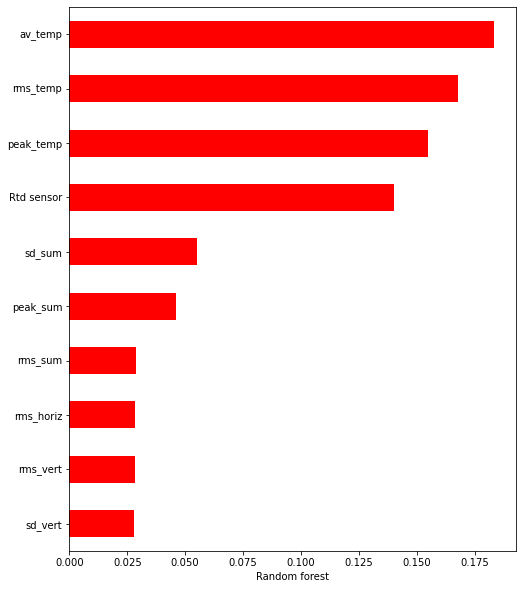

In [149]:
plot_features_weights('Random forest',rf.feature_importances_, X_train.columns)

In [150]:
ans_train = pd.DataFrame(y_train.values,columns=["real group"])
ans_train["pre_group(no time)"] = y_train_predict
ans_train["real_rul"] = one_train["RUL_x"]

In [160]:
ans_test = pd.DataFrame(y_test.values,columns=["real group"])
ans_test["pre_group(no time)"] = y_test_predict
ans_test["real_rul"] = one_test["RUL_x"]

In [224]:
ans_train["time"] = one_train["time"]
ans_test["time"] = one_test["time"]

### 加入時間因素考量time group

In [152]:
from sklearn.linear_model import LogisticRegression

In [166]:
X_train = ans_train[["pre_group(no time)","time"]]
y_train = ans_train["real group"]
X_test = ans_test[["pre_group(no time)","time"]]
y_test = ans_test["real group"]

In [169]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [170]:
y_test_predict = lr.predict(X_test)
y_train_predict = lr.predict(X_train)

train_score = accuracy_score(y_train, y_train_predict)
test_score = accuracy_score(y_test, y_test_predict)
train_f1 = f1_score(y_train, y_train_predict,average="weighted")
test_f1 = f1_score(y_test, y_test_predict,average="weighted")
print('accuracy training: %.3f, accuracy testing: %.3f' % (
      (train_score), (test_score)))
print('F1 training: %.3f, F1 testing: %.3f' % (
      (train_f1), (test_f1)))

accuracy training: 0.908, accuracy testing: 0.712
F1 training: 0.908, F1 testing: 0.703


In [171]:
from sklearn.tree import DecisionTreeClassifier

In [178]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [179]:
y_test_predict = dt.predict(X_test)
y_train_predict = dt.predict(X_train)

train_score = accuracy_score(y_train, y_train_predict)
test_score = accuracy_score(y_test, y_test_predict)
train_f1 = f1_score(y_train, y_train_predict,average="weighted")
test_f1 = f1_score(y_test, y_test_predict,average="weighted")
print('accuracy training: %.3f, accuracy testing: %.3f' % (
      (train_score), (test_score)))
print('F1 training: %.3f, F1 testing: %.3f' % (
      (train_f1), (test_f1)))

accuracy training: 0.953, accuracy testing: 0.770
F1 training: 0.953, F1 testing: 0.769


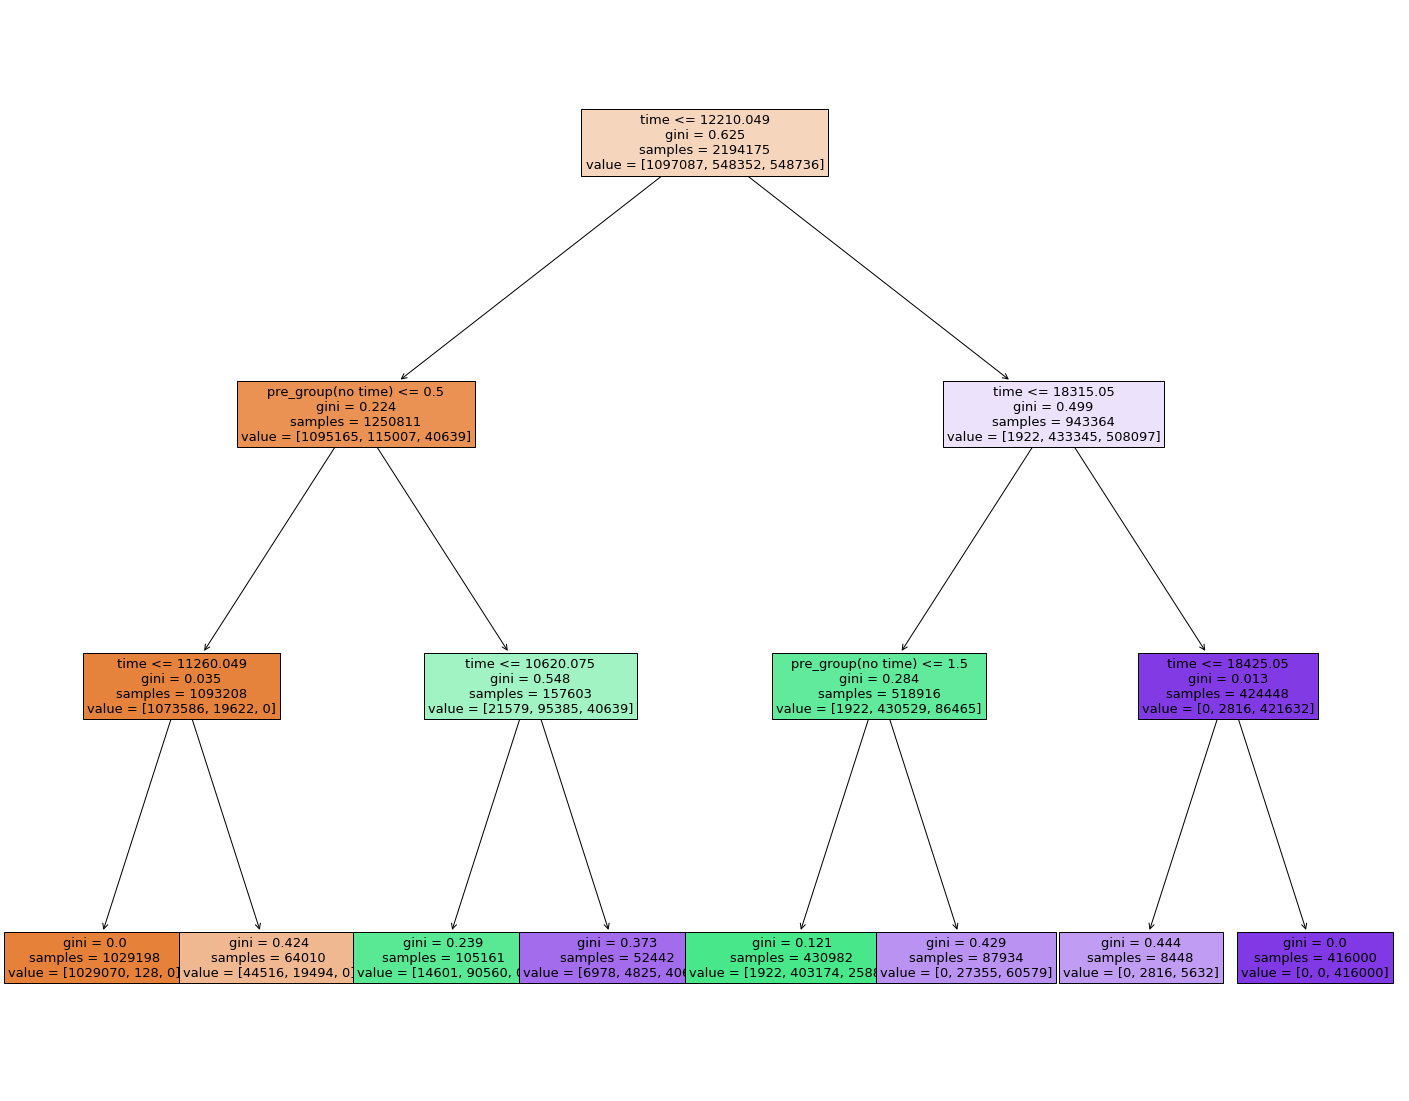

In [181]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=X_train.columns,
                   fontsize=13,
                   filled=True)

In [185]:
ans_train["pre_group(time)"] = y_train_predict
ans_test["pre_group(time)"] = y_test_predict

In [335]:
ans_train = ans_train.drop(["level_0","index"], axis=1)
ans_test = ans_test.drop(["level_0","index"], axis=1)

### step 2 train each class

#### 1. class 0

In [504]:
X_train = one_train[one_train["time_group"]==0].drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
X_test = one_test[one_test["time_group"]==0].drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
y_train = one_train[one_train["time_group"]==0]["RUL_x"]
y_test = one_test[one_test["time_group"]==0]["RUL_x"]

In [505]:
X_train = X_train[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]
X_test = X_test[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]

In [506]:
X_train.columns

Index(['rms_vert', 'rms_horiz', 'av_sum', 'Rtd sensor', 'sd_vert', 'sd_temp',
       'sd_horiz', 'rms_sum', 'peak_temp', 'f96_vert', 'f96_sum', 'f40_vert',
       'f32_vert', 'f16_vert', 'f16_sum', 'av_temp', 'skew_temp', 'shape_sum',
       'sd_sum', 'rms_temp', 'peak_vert', 'peak_sum', 'kurt_temp', 'kurt_sum',
       'f8_vert', 'f88_sum', 'f80_vert', 'f80_sum', 'f8', 'f72_vert',
       'f72_sum', 'f56_vert', 'f56_sum', 'f40_sum', 'f32_sum', 'f24_vert',
       'f24', 'f192_vert', 'f192_sum', 'f184_vert', 'f184_sum', 'f168_vert',
       'f160_vert', 'f160_sum', 'f16', 'f144_vert', 'f120_vert', 'f120_sum',
       'f112_vert', 'f104_vert', 'f104_sum', 'clear_temp'],
      dtype='object')

In [509]:
from lightgbm import LGBMRegressor

In [521]:
lgb = LGBMRegressor(n_estimators=20,n_jobs=- 1,reg_lambda=0.5)
lgb.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=20, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.5, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [522]:
y_test_predict = lgb.predict(X_test)
y_train_predict = lgb.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_predict)
test_mse = mean_squared_error(y_test, y_test_predict)
print('MSE training: %.3f, MSE testing: %.3f' % (
      (train_mse), (test_mse)))
print('RMSE training: %.3f, RMSE testing: %.3f' % (
      (train_mse**0.5), (test_mse**0.5)))
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MSE training: 1575252.606, MSE testing: 98423601.629
RMSE training: 1255.091, RMSE testing: 9920.867
MAE training: 1014.512, MAE testing: 9394.194


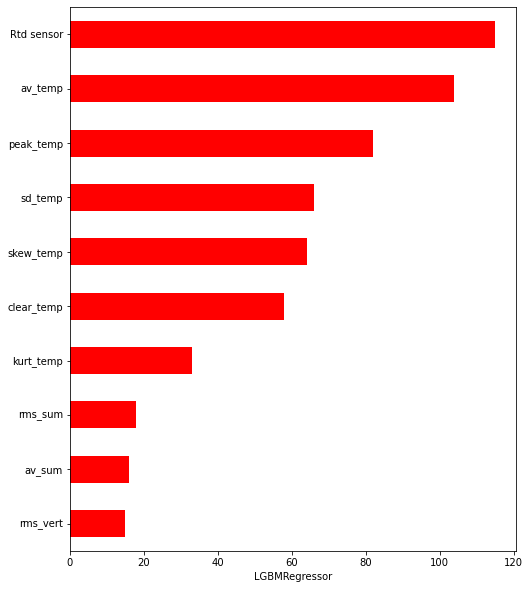

In [523]:
plot_features_weights('LGBMRegressor',rf.feature_importances_, X_train.columns)

In [524]:
X_real_train = one_train.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time","time_group"], axis=1)
X_real_test = one_test.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time","time_group"], axis=1)

In [525]:
X_real_train = X_real_train[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]
X_real_test = X_real_test[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]

In [526]:
y_test_predict_all = lgb.predict(X_real_test)
y_train_predict_all = lgb.predict(X_real_train)

In [528]:
ans_train["class 0 predict"] = y_train_predict_all
ans_test["class 0 predict"] = y_test_predict_all

#### 2. class 1

In [530]:
X_train = one_train[one_train["time_group"]==1].drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
X_test = one_test[one_test["time_group"]==1].drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
y_train = one_train[one_train["time_group"]==1]["RUL_x"]
y_test = one_test[one_test["time_group"]==1]["RUL_x"]

In [535]:
X_train = X_train[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]
X_test = X_test[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]

In [536]:
X_train.columns

Index(['rms_vert', 'rms_horiz', 'av_sum', 'Rtd sensor', 'sd_vert', 'sd_temp',
       'sd_horiz', 'rms_sum', 'peak_temp', 'f96_vert', 'f96_sum', 'f40_vert',
       'f32_vert', 'f16_vert', 'f16_sum', 'av_temp', 'skew_temp', 'shape_sum',
       'sd_sum', 'rms_temp', 'peak_vert', 'peak_sum', 'kurt_temp', 'kurt_sum',
       'f8_vert', 'f88_sum', 'f80_vert', 'f80_sum', 'f8', 'f72_vert',
       'f72_sum', 'f56_vert', 'f56_sum', 'f40_sum', 'f32_sum', 'f24_vert',
       'f24', 'f192_vert', 'f192_sum', 'f184_vert', 'f184_sum', 'f168_vert',
       'f160_vert', 'f160_sum', 'f16', 'f144_vert', 'f120_vert', 'f120_sum',
       'f112_vert', 'f104_vert', 'f104_sum', 'clear_temp'],
      dtype='object')

In [537]:
lgb = LGBMRegressor(n_estimators=20,n_jobs=- 1,reg_lambda=0.5)
lgb.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=20, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.5, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [538]:
y_test_predict = lgb.predict(X_test)
y_train_predict = lgb.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_predict)
test_mse = mean_squared_error(y_test, y_test_predict)
print('MSE training: %.3f, MSE testing: %.3f' % (
      (train_mse), (test_mse)))
print('RMSE training: %.3f, RMSE testing: %.3f' % (
      (train_mse**0.5), (test_mse**0.5)))
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MSE training: 1026168.050, MSE testing: 18973261.758
RMSE training: 1013.000, RMSE testing: 4355.831
MAE training: 806.509, MAE testing: 4026.746


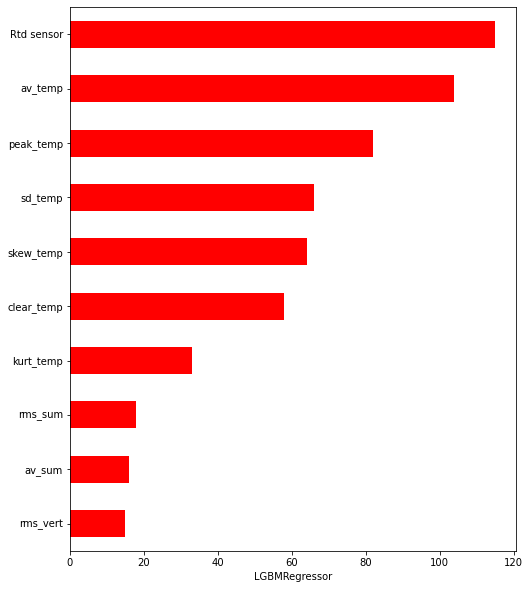

In [540]:
plot_features_weights('LGBMRegressor',rf.feature_importances_, X_train.columns)

In [541]:
X_real_train = one_train.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time","time_group"], axis=1)
X_real_test = one_test.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time","time_group"], axis=1)

X_real_train = X_real_train[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]
X_real_test = X_real_test[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]

y_test_predict_all = lgb.predict(X_real_test)
y_train_predict_all = lgb.predict(X_real_train)

ans_train["class 1 predict"] = y_train_predict_all
ans_test["class 1 predict"] = y_test_predict_all

#### 3. class 2

In [542]:
X_train = one_train[one_train["time_group"]==2].drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
X_test = one_test[one_test["time_group"]==2].drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
y_train = one_train[one_train["time_group"]==2]["RUL_x"]
y_test = one_test[one_test["time_group"]==2]["RUL_x"]

In [543]:
X_train = X_train[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]
X_test = X_test[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]
X_train.columns

Index(['rms_vert', 'rms_horiz', 'av_sum', 'Rtd sensor', 'sd_vert', 'sd_temp',
       'sd_horiz', 'rms_sum', 'peak_temp', 'f96_vert', 'f96_sum', 'f40_vert',
       'f32_vert', 'f16_vert', 'f16_sum', 'av_temp', 'skew_temp', 'shape_sum',
       'sd_sum', 'rms_temp', 'peak_vert', 'peak_sum', 'kurt_temp', 'kurt_sum',
       'f8_vert', 'f88_sum', 'f80_vert', 'f80_sum', 'f8', 'f72_vert',
       'f72_sum', 'f56_vert', 'f56_sum', 'f40_sum', 'f32_sum', 'f24_vert',
       'f24', 'f192_vert', 'f192_sum', 'f184_vert', 'f184_sum', 'f168_vert',
       'f160_vert', 'f160_sum', 'f16', 'f144_vert', 'f120_vert', 'f120_sum',
       'f112_vert', 'f104_vert', 'f104_sum', 'clear_temp'],
      dtype='object')

In [544]:
lgb = LGBMRegressor(n_estimators=20,n_jobs=- 1,reg_lambda=0.5)
lgb.fit(X_train, y_train)
y_test_predict = lgb.predict(X_test)
y_train_predict = lgb.predict(X_train)

In [545]:
train_mse = mean_squared_error(y_train, y_train_predict)
test_mse = mean_squared_error(y_test, y_test_predict)
print('MSE training: %.3f, MSE testing: %.3f' % (
      (train_mse), (test_mse)))
print('RMSE training: %.3f, RMSE testing: %.3f' % (
      (train_mse**0.5), (test_mse**0.5)))
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MSE training: 474136.058, MSE testing: 6247055.355
RMSE training: 688.575, RMSE testing: 2499.411
MAE training: 509.748, MAE testing: 1920.983


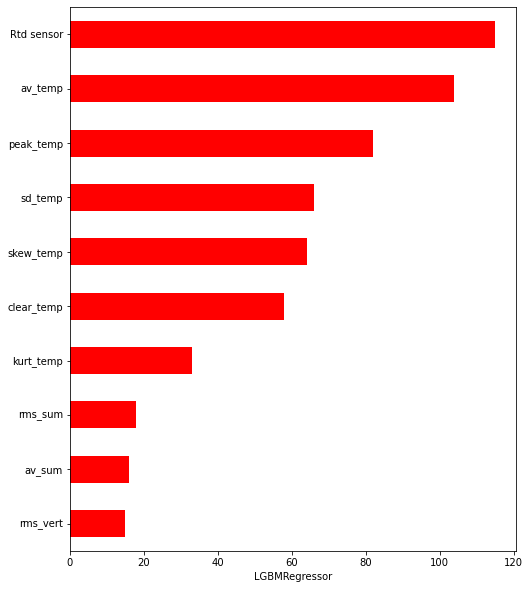

In [546]:
plot_features_weights('LGBMRegressor',rf.feature_importances_, X_train.columns)

In [547]:
X_real_train = one_train.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time","time_group"], axis=1)
X_real_test = one_test.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time","time_group"], axis=1)

X_real_train = X_real_train[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]
X_real_test = X_real_test[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]

y_test_predict_all = lgb.predict(X_real_test)
y_train_predict_all = lgb.predict(X_real_train)

ans_train["class 2 predict"] = y_train_predict_all
ans_test["class 2 predict"] = y_test_predict_all

In [553]:
ans_train

,real group,pre_group(no time),real_rul,time,pre_group(time),class 0 predict,class 1 predict,class 2 predict
0,0.0,0.0,14160.099610,0.000000,0.0,18090.373163,8473.133075,3514.554495
1,0.0,0.0,14160.099220,0.000390,0.0,18090.373163,8473.133075,3514.554495
2,0.0,0.0,14160.098830,0.000780,0.0,18090.373163,8473.133075,3514.554495
3,0.0,0.0,14160.098440,0.001170,0.0,18090.373163,8473.133075,3514.554495
4,0.0,0.0,14160.098050,0.001560,0.0,18090.373163,8473.133075,3514.554495
...,...,...,...,...,...,...,...,...
2194170,2.0,2.0,0.001562,22520.098047,2.0,16030.632226,7802.416095,513.824268
2194171,2.0,2.0,0.001171,22520.098438,2.0,16030.632226,7802.416095,513.824268
2194172,2.0,2.0,0.000781,22520.098828,2.0,16030.632226,7802.416095,513.824268
2194173,2.0,2.0,0.000390,22520.099219,2.0,16030.632226,7802.416095,513.824268


In [556]:
ans_train = ans_train.reset_index()
ans_test = ans_test.reset_index()

In [580]:
ans_train.loc[ans_train["pre_group(no time)"]==0,"final predict"] = ans_train.loc[ans_train["pre_group(no time)"]==0,"class 0 predict"]
ans_train.loc[ans_train["pre_group(no time)"]==1,"final predict"] = ans_train.loc[ans_train["pre_group(no time)"]==1,"class 1 predict"]
ans_train.loc[ans_train["pre_group(no time)"]==2,"final predict"] = ans_train.loc[ans_train["pre_group(no time)"]==2,"class 2 predict"]

In [581]:
ans_test.loc[ans_test["pre_group(no time)"]==0,"final predict"] = ans_test.loc[ans_test["pre_group(no time)"]==0,"class 0 predict"]
ans_test.loc[ans_test["pre_group(no time)"]==1,"final predict"] = ans_test.loc[ans_test["pre_group(no time)"]==1,"class 1 predict"]
ans_test.loc[ans_test["pre_group(no time)"]==2,"final predict"] = ans_test.loc[ans_test["pre_group(no time)"]==2,"class 2 predict"]

In [569]:
ans_train

,index,real group,pre_group(no time),real_rul,time,pre_group(time),class 0 predict,class 1 predict,class 2 predict,final predict
0,0,0.0,0.0,14160.099610,0.000000,0.0,18090.373163,8473.133075,3514.554495,18090.373163
1,1,0.0,0.0,14160.099220,0.000390,0.0,18090.373163,8473.133075,3514.554495,18090.373163
2,2,0.0,0.0,14160.098830,0.000780,0.0,18090.373163,8473.133075,3514.554495,18090.373163
3,3,0.0,0.0,14160.098440,0.001170,0.0,18090.373163,8473.133075,3514.554495,18090.373163
4,4,0.0,0.0,14160.098050,0.001560,0.0,18090.373163,8473.133075,3514.554495,18090.373163
...,...,...,...,...,...,...,...,...,...,...
2194170,2194170,2.0,2.0,0.001562,22520.098047,2.0,16030.632226,7802.416095,513.824268,513.824268
2194171,2194171,2.0,2.0,0.001171,22520.098438,2.0,16030.632226,7802.416095,513.824268,513.824268
2194172,2194172,2.0,2.0,0.000781,22520.098828,2.0,16030.632226,7802.416095,513.824268,513.824268
2194173,2194173,2.0,2.0,0.000390,22520.099219,2.0,16030.632226,7802.416095,513.824268,513.824268


In [578]:
ans_train.loc[ans_train["pre_group(time)"]==0,"final predict(time)"] = ans_train.loc[ans_train["pre_group(time)"]==0,"class 0 predict"]
ans_train.loc[ans_train["pre_group(time)"]==1,"final predict(time)"] = ans_train.loc[ans_train["pre_group(time)"]==1,"class 1 predict"]
ans_train.loc[ans_train["pre_group(time)"]==2,"final predict(time)"] = ans_train.loc[ans_train["pre_group(time)"]==2,"class 2 predict"]

In [579]:
ans_test.loc[ans_test["pre_group(time)"]==0,"final predict(time)"] = ans_test.loc[ans_test["pre_group(time)"]==0,"class 0 predict"]
ans_test.loc[ans_test["pre_group(time)"]==1,"final predict(time)"] = ans_test.loc[ans_test["pre_group(time)"]==1,"class 1 predict"]
ans_test.loc[ans_test["pre_group(time)"]==2,"final predict(time)"] = ans_test.loc[ans_test["pre_group(time)"]==2,"class 2 predict"]

In [570]:
train_mse = mean_squared_error(ans_train["real_rul"], ans_train["final predict"])
test_mse = mean_squared_error(ans_test["real_rul"], ans_test["final predict"])
print('MSE training: %.3f, MSE testing: %.3f' % (
      (train_mse), (test_mse)))
print('RMSE training: %.3f, RMSE testing: %.3f' % (
      (train_mse**0.5), (test_mse**0.5)))
train_mape = mean_absolute_error(ans_train["real_rul"], ans_train["final predict"])
test_mape = mean_absolute_error(ans_test["real_rul"], ans_test["final predict"])
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MSE training: 30579216.755, MSE testing: 62960946.902
RMSE training: 5529.848, RMSE testing: 7934.793
MAE training: 3510.011, MAE testing: 6365.431


In [582]:
train_mse = mean_squared_error(ans_train["real_rul"], ans_train["final predict(time)"])
test_mse = mean_squared_error(ans_test["real_rul"], ans_test["final predict(time)"])
print('MSE training: %.3f, MSE testing: %.3f' % (
      (train_mse), (test_mse)))
print('RMSE training: %.3f, RMSE testing: %.3f' % (
      (train_mse**0.5), (test_mse**0.5)))
train_mape = mean_absolute_error(ans_train["real_rul"], ans_train["final predict(time)"])
test_mape = mean_absolute_error(ans_test["real_rul"], ans_test["final predict(time)"])
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MSE training: 2180169.356, MSE testing: 70335408.284
RMSE training: 1476.540, RMSE testing: 8386.621
MAE training: 979.377, MAE testing: 7399.461


In [571]:
X_train = one_train.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
X_test = one_test.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
y_train = one_train["RUL_x"]
y_test = one_test["RUL_x"]

X_train = X_train[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]
X_test = X_test[list(imp_df[imp_df["Total"]>=2]["Feature"].values)]

X_train.columns

Index(['rms_vert', 'rms_horiz', 'av_sum', 'Rtd sensor', 'sd_vert', 'sd_temp',
       'sd_horiz', 'rms_sum', 'peak_temp', 'f96_vert', 'f96_sum', 'f40_vert',
       'f32_vert', 'f16_vert', 'f16_sum', 'av_temp', 'skew_temp', 'shape_sum',
       'sd_sum', 'rms_temp', 'peak_vert', 'peak_sum', 'kurt_temp', 'kurt_sum',
       'f8_vert', 'f88_sum', 'f80_vert', 'f80_sum', 'f8', 'f72_vert',
       'f72_sum', 'f56_vert', 'f56_sum', 'f40_sum', 'f32_sum', 'f24_vert',
       'f24', 'f192_vert', 'f192_sum', 'f184_vert', 'f184_sum', 'f168_vert',
       'f160_vert', 'f160_sum', 'f16', 'f144_vert', 'f120_vert', 'f120_sum',
       'f112_vert', 'f104_vert', 'f104_sum', 'clear_temp'],
      dtype='object')

In [572]:
lgb = LGBMRegressor(n_estimators=20,n_jobs=- 1,reg_lambda=0.5)
lgb.fit(X_train, y_train)

y_test_predict = lgb.predict(X_test)
y_train_predict = lgb.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_predict)
test_mse = mean_squared_error(y_test, y_test_predict)
print('MSE training: %.3f, MSE testing: %.3f' % (
      (train_mse), (test_mse)))
print('RMSE training: %.3f, RMSE testing: %.3f' % (
      (train_mse**0.5), (test_mse**0.5)))
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

MSE training: 12953840.104, MSE testing: 70250852.179
RMSE training: 3599.144, RMSE testing: 8381.578
MAE training: 2740.729, MAE testing: 6596.583


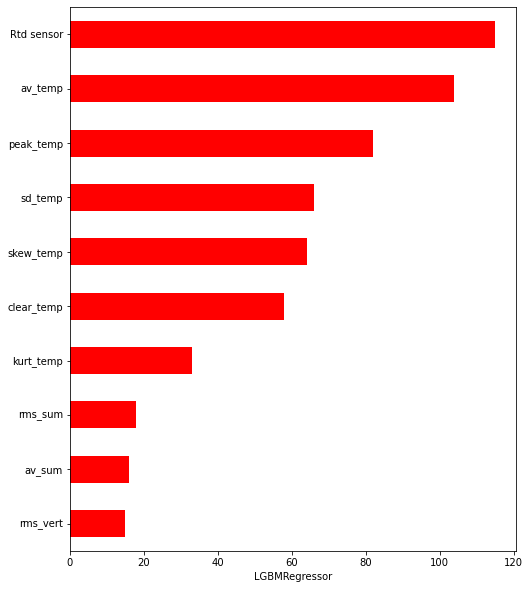

In [573]:
plot_features_weights('LGBMRegressor',rf.feature_importances_, X_train.columns)

In [61]:
ans_df[ans_df["RUL"]>10000]

,RUL,rf_predict
0,28020.099605,15356.027831
1,28020.099214,15176.099507
2,28020.098824,16848.654019
3,28020.098433,16848.654019
4,28020.098042,15657.801022
...,...,...
543227,28072.201560,7309.972206
543228,28072.201170,7266.249676
543229,28072.200780,6636.463772
543230,28072.200390,6423.953280


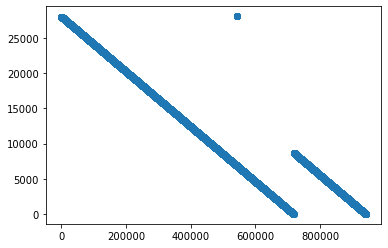

In [60]:
plt.scatter(ans_df.index,ans_df["RUL"])

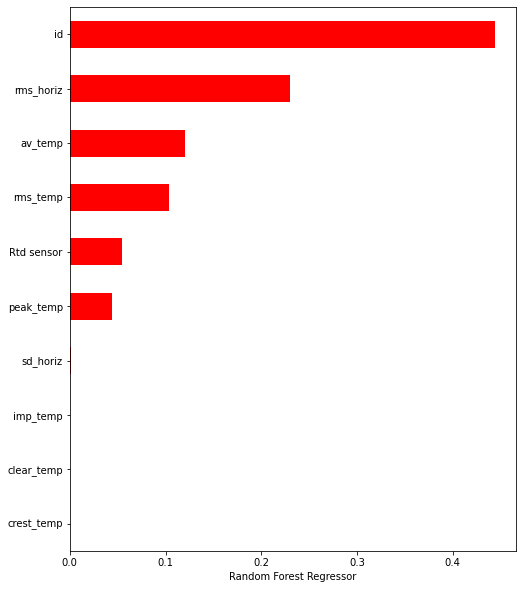

In [58]:
plot_features_weights('Random Forest Regressor', rf.feature_importances_, X_train.columns)

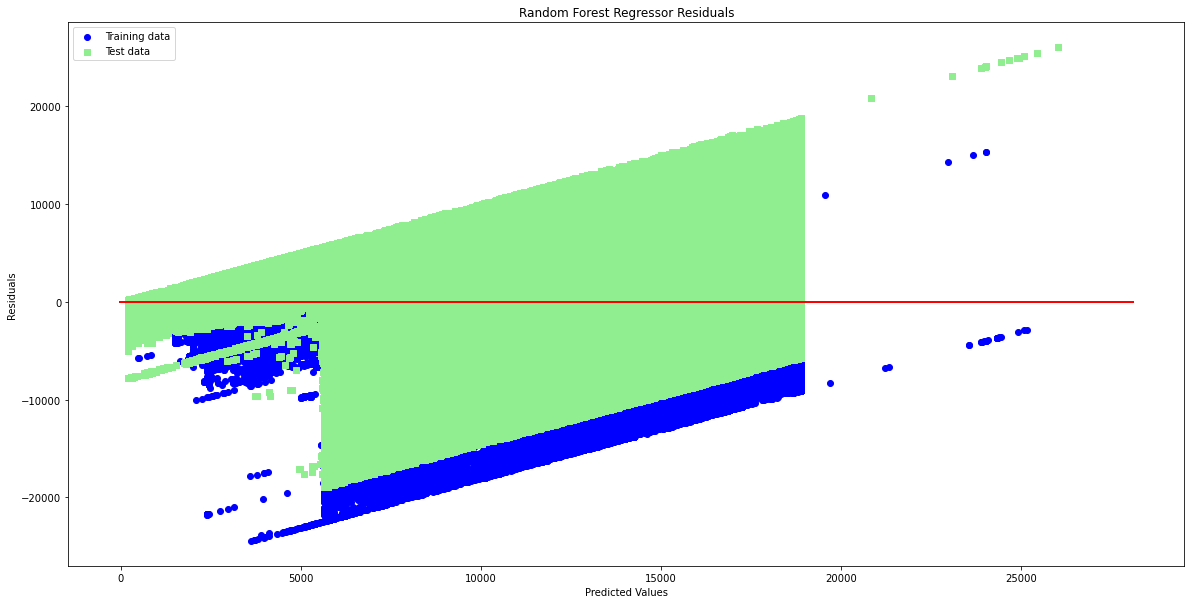

In [46]:
plot_residual('Random Forest Regressor',y_train, y_train_predict, y_test, y_test_predict)

In [150]:
y_train

0         28020.099605
1         28020.099214
2         28020.098824
3         28020.098433
4         28020.098042
              ...     
940538        0.001560
940539        0.001170
940540        0.000780
940541        0.000390
940542        0.000000
Name: RUL, Length: 940543, dtype: float64

In [149]:
y_train_predict 

array([15090.69924777, 14191.4132257 , 16939.07715585, ...,
         183.10801738,   183.10801738,   183.10801738])

In [ ]:
mean_absolute_percentage_error

In [36]:
X_train.isnull().values.any()

False

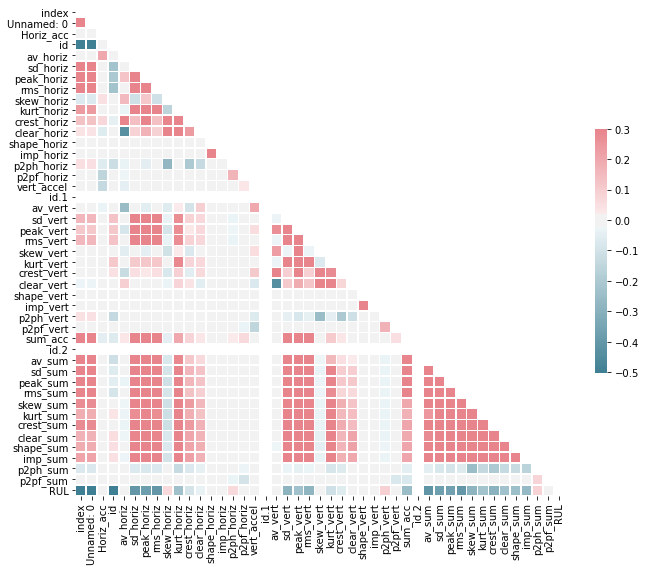

In [75]:
# 計算相關係數
corr = one_train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

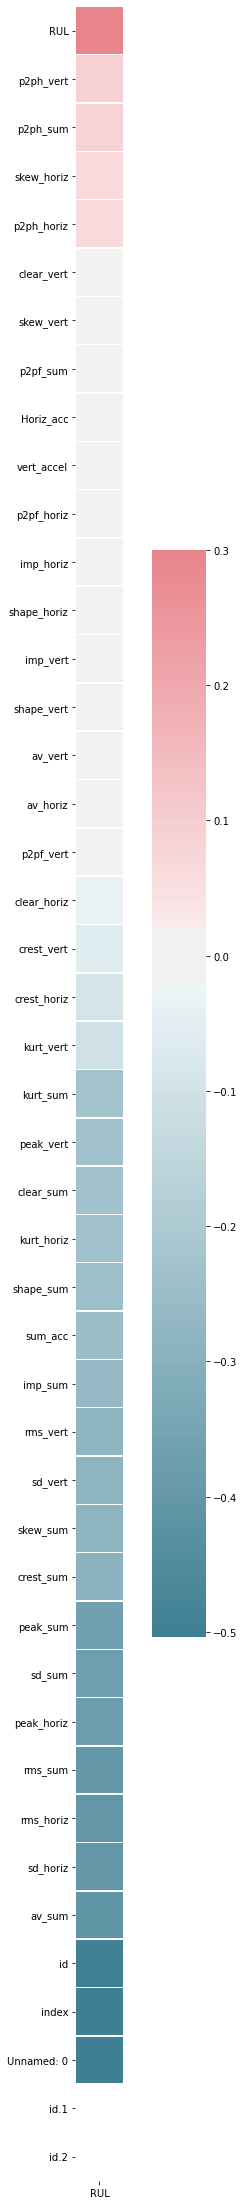

In [90]:
plt.figure(figsize=(10,40))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(pd.DataFrame(corr["RUL"].sort_values(ascending=False)), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

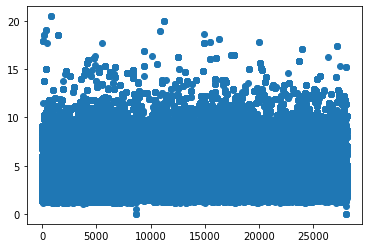

In [93]:
plt.scatter(one_train["RUL"],one_train["p2ph_vert"])

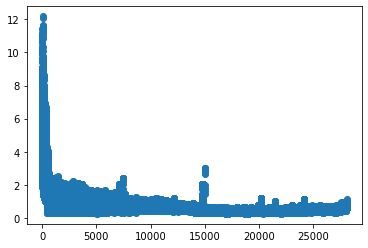

In [94]:
plt.scatter(one_train["RUL"],one_train["av_sum"])